# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [1]:
library('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [2]:
#Tried using the raw URL but keep on getting the error message.
measles = read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/master/data/2020/2020-02-25/measles.csv')

In [3]:
measles |> head()

,index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<int>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [16]:
# create the df_vacc_rates here
df_vacc_rates = measles |> filter(mmr >= 0) |>
group_by(state) |>
 summarize(Total.schools = n(), 
           Schools.95graeter = sum(mmr >= 95, na.rm = TRUE), 
           fraction = Schools.95graeter / Total.schools)

df_vacc_rates

state,Total.schools,Schools.95graeter,fraction
<chr>,<int>,<int>,<dbl>
Arizona,1171,593,0.506404782
Arkansas,567,2,0.003527337
California,14225,12639,0.888506151
Colorado,1507,939,0.623092236
Connecticut,589,478,0.811544992
Illinois,7686,6893,0.896825397
Maine,357,169,0.473389356
Massachusetts,954,826,0.865828092
Minnesota,1593,755,0.473948525


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [17]:
arranged_df = df_vacc_rates |> slice_min(fraction)
arranged_df


#Arkansas

state,Total.schools,Schools.95graeter,fraction
<chr>,<int>,<int>,<dbl>
Arkansas,567,2,0.003527337


**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `mutate`, and `cume_dist`.

In [19]:
#The row that Overall == -1 does not make sense, so filtered out.
measles.ECDF = measles |>
    filter(state == 'North Carolina' & overall > 0) |>
    arrange(overall) |>
    mutate(cumulative = cume_dist(overall))
measles.ECDF |> head()

,index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng,cumulative
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<int>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1766,North Carolina,2018-19,Annunciation Catholic,NA,NA,Craven,NA,23,-1,21.7,NA,NA,NA,34.87682,-76.90448,0.0004798464
2,1765,North Carolina,2018-19,Starmount Acad of Excellence,NA,NA,Mecklenburg,NA,77,-1,40.3,NA,NA,NA,35.13929,-80.87051,0.0009596929
3,1764,North Carolina,2018-19,Spruce Pine Montessori,NA,NA,Mitchell,NA,7,-1,42.9,NA,NA,NA,35.91674,-82.06719,0.0014395393
4,1763,North Carolina,2018-19,Moyock Elementary,NA,NA,Currituck,NA,85,-1,43.5,NA,NA,NA,36.52490,-76.17366,0.0019193858
5,1762,North Carolina,2018-19,Liberty Christian,NA,NA,Durham,NA,20,-1,45.0,NA,5.0,NA,36.06362,-78.92544,0.0023992322
6,1761,North Carolina,2018-19,Nations Ford Elementary,NA,NA,Mecklenburg,NA,117,-1,45.3,NA,0.9,NA,35.15489,-80.90022,0.0028790787


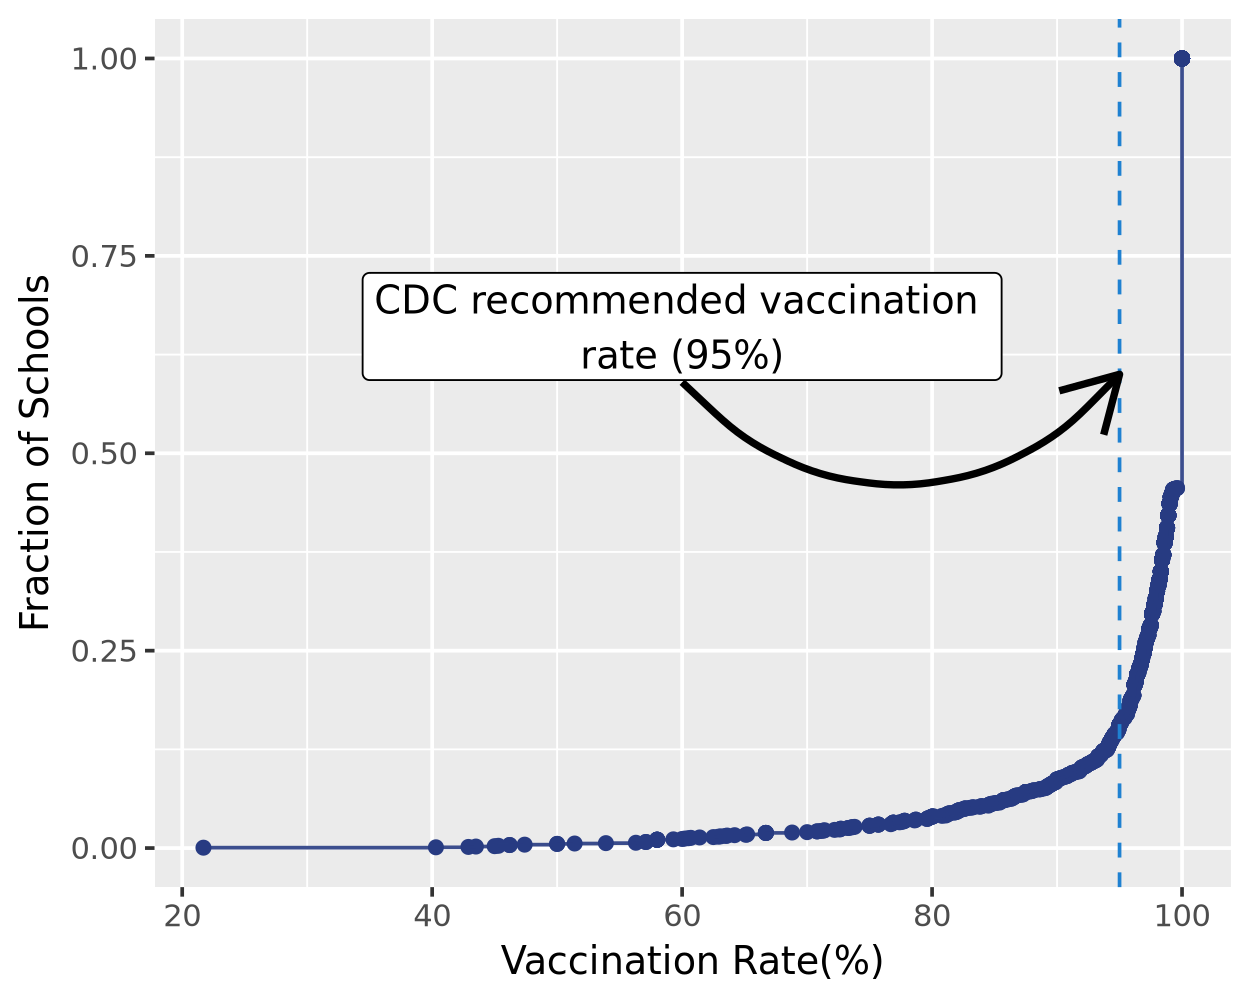

In [23]:
ggplot(measles.ECDF, aes(x = overall, y = cumulative))+
geom_point(color = '#273b82')+
geom_step(alpha =.9, color = '#273b82')+
geom_vline(aes(xintercept = 95),linetype="dashed", color = '#1f81d1')+
xlab('Vaccination Rate(%)')+
ylab('Fraction of Schools')+
annotate(x=60,y=1,label="CDC recommended vaccination 
rate (95%)",vjust=3,geom="label")+
annotate('curve', x = 60, y = 0.59, xend = 95, yend = .6, linewidth = 1, arrow = arrow())

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it. I used `geom_text_repel` from [ggrepel](https://cran.r-project.org/web/packages/ggrepel/vignettes/ggrepel.html) fo the annotation.)

![](https://github.com/chuckpr/BIOS512/blob/main/assignments/2023/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

In [ ]:
geom_hline(aes(yintercept = 0.5),linetype="dashed", color = 'green')

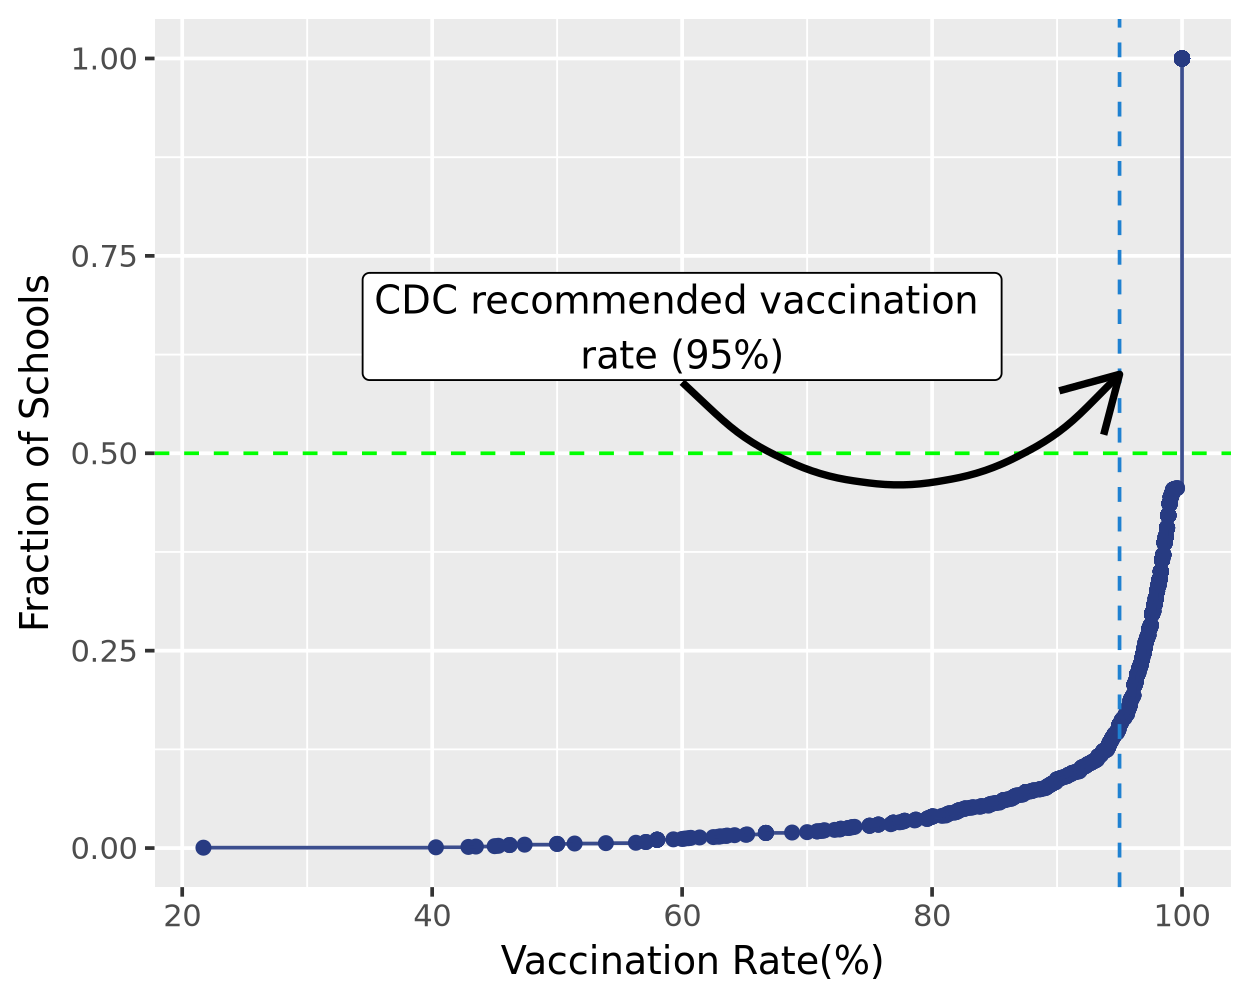

In [24]:
ggplot(measles.ECDF, aes(x = overall, y = cumulative))+
geom_point(color = '#273b82')+
geom_step(alpha =.9, color = '#273b82')+
geom_vline(aes(xintercept = 95),linetype="dashed", color = '#1f81d1')+
geom_hline(aes(yintercept = 0.5),linetype="dashed", color = 'green')+
xlab('Vaccination Rate(%)')+
ylab('Fraction of Schools')+
annotate(x=60,y=1,label="CDC recommended vaccination 
rate (95%)",vjust=3,geom="label")+
annotate('curve', x = 60, y = 0.59, xend = 95, yend = .6, linewidth = 1, arrow = arrow())

In [26]:
#The median vaccination rate for NC schools was above the CDC recommended target which is about 99%.